Elizabeth Vaisman
318775277
EM group

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.graphics.tsaplots as tsaplots
import scipy.stats as stats

In [29]:
def check_spike(spike_train, p_abs_ref, p_ref):
  if spike_train[-1] == 1 and len(spike_train)<90000: # if there was a spike in the last ms, and the spike_train is smaller than 90,000 ms
    spike_train = np.hstack((spike_train, p_abs_ref)) # add the refractory period
    for p1 in p_ref: # itterate over all probabilities in refractory period
      if len(spike_train)<90000:
        spike_train = np.hstack((spike_train, np.random.choice([1,0],p=[p1, 1-p1]))) # randomly fire a spike with p1 probability
        spike_train = check_spike(spike_train, p_abs_ref, p_ref) # check if there was a spike recursively
         #(cause if there was a spike, again we are entering the absolute refractory period)
  else:
    return spike_train

  return spike_train

In [30]:
r0 = 55 # spikes/sec
p = r0/1000 # spikes/ms - probability to get a spike each ms -
p_abs_ref = np.zeros(5,) # absolute refractory period
r_ref = r0*np.array([1/6, 2/6, 3/6, 4/6, 5/6]) # recovery period
p_ref = r_ref/1000 # rate to probability per ms for recoveery period
spike_train = np.array([np.random.choice([1,0],p=[p, 1-p])]) # first input
while len(spike_train)<90000: # while the signal is smaller then 90,000 ms
  spike_train = check_spike(spike_train, p_abs_ref, p_ref) # check if there was a spike in the last appended ms.
  spike_train = np.hstack((spike_train, np.random.choice([1,0],p=[p, 1-p])))




Text(0, 0.5, 'p')

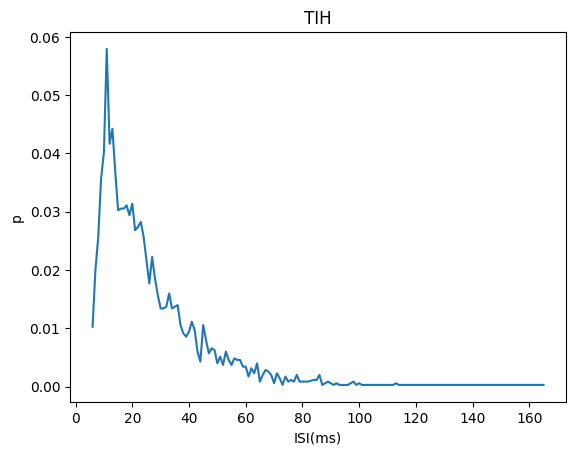

In [31]:
# TIH - PDF

indices = np.where(spike_train == 1)
ISIs = np.diff(indices) # calculate the distances of ms between adjacent spikes
values, counts = np.unique_counts(ISIs) # count the number of unique ISIs
PDF = counts/np.sum(counts) # count --> probability
plt.plot(values, PDF)
plt.title('TIH')
plt.xlabel('ISI(ms)')
plt.ylabel('p')

In [37]:
print(np.min(ISIs))
print(values[PDF==np.max(PDF)])

6
[11]


Text(0, 0.5, 'p')

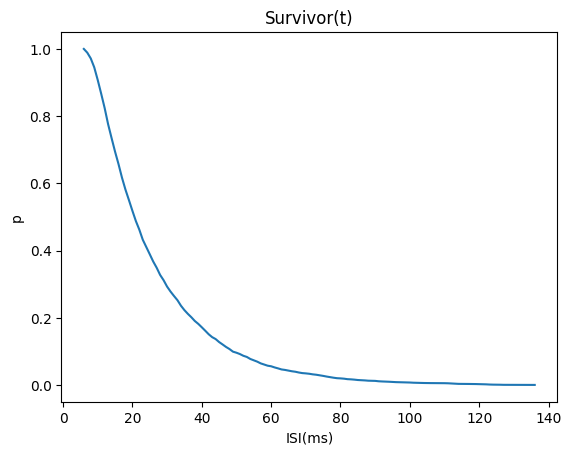

In [ ]:
survivor = []
for i in range(len(PDF)):
  survivor.append(1-sum(PDF[:i])) # calculate (1 - cummulitive sum) up to each
  # ISI (ms), survivor = the probability that the neuron didn't fire up to that ISI.
plt.plot(values, survivor)
plt.title('Survivor(t)')
plt.xlabel('ISI(ms)')
plt.ylabel('p')


Text(0, 0.5, 'p')

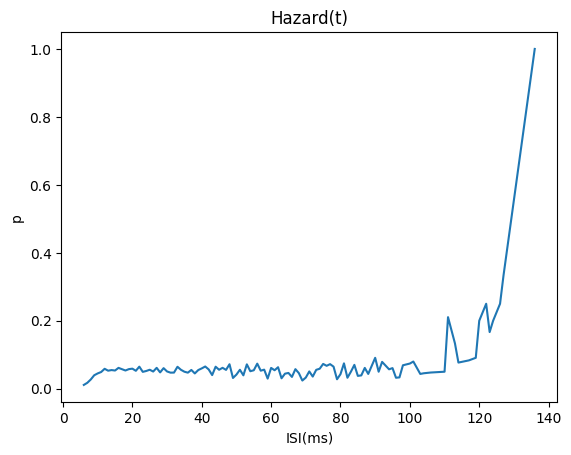

In [ ]:
hazard = PDF/survivor # the probability to fire at an ISI if up until that ISI there was no firing.
plt.plot(values, hazard)
plt.title('Hazard(t)')
plt.xlabel('ISI(ms)')
plt.ylabel('p')

Text(0, 0.5, 'Rate (Hz)')

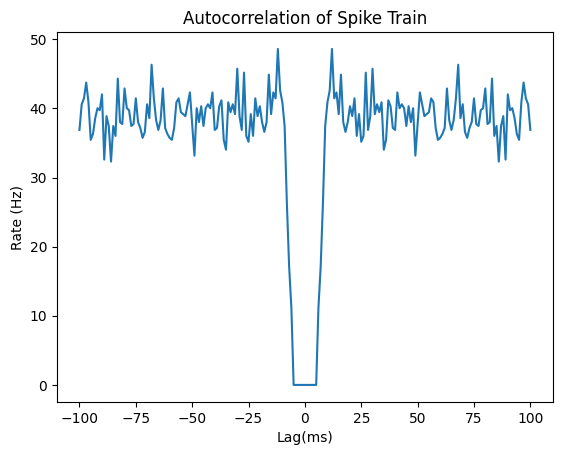

In [ ]:
lags, c, _, _ = plt.acorr(spike_train, maxlags=100) # c is normalized to probability automatically
plt.clf()
c[lags==0] = 0
delta_t = 0.001 # sec - the resolution and bin size during sliding
c = c/delta_t # normalize to rate
plt.plot(lags, c)
plt.title('Autocorrelation of Spike Train')
plt.xlabel('Lag(ms)')
plt.ylabel('Rate (Hz)')

Text(0, 0.5, 'p')

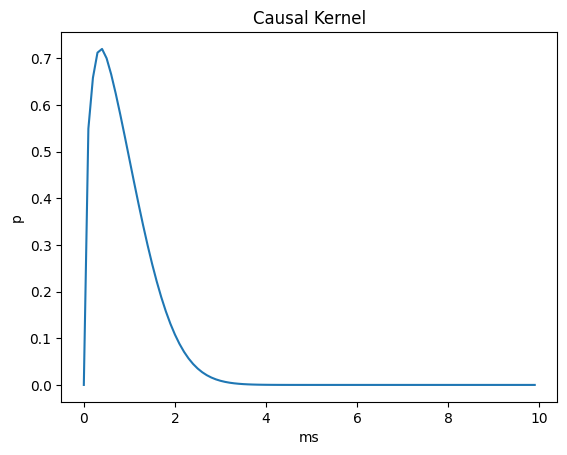

In [ ]:
x = np.arange(0,10,0.1)
kernel_pdf = stats.skewnorm.pdf(x,5) # skewed kernel
kernel_pdf[0] = 0 # usually a causal kernel starts from y=0,
# then in convolution it is being flipped so to take to account only the past observation
plt.plot(x, kernel_pdf)
plt.title('Causal Kernel')
plt.xlabel('ms')
plt.ylabel('p')

Text(0, 0.5, 'Rate (Hz)')

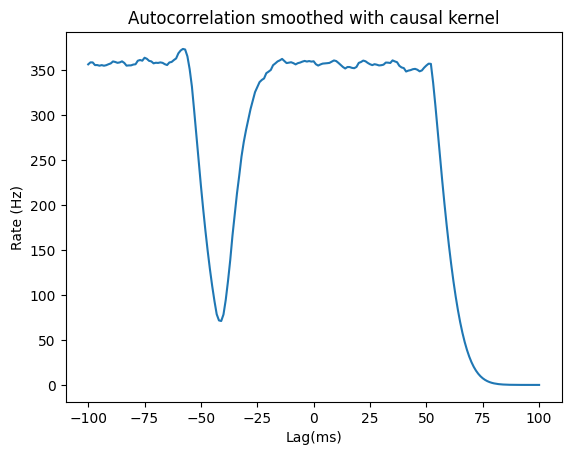

In [ ]:
conv = np.convolve(c, kernel_pdf, 'same')
plt.plot(lags, conv)
plt.title('Autocorrelation smoothed with causal kernel')
plt.xlabel('Lag(ms)')
plt.ylabel('Rate (Hz)')